In [1]:
import wbgapi as wb  # https://pypi.org/project/wbgapi/
import pandas as pd

In [4]:
wb.source.info()

id    name                                                                  code      concepts  lastupdated
----  --------------------------------------------------------------------  ------  ----------  -------------
1     Doing Business                                                        DBS              3  2021-08-18
2     World Development Indicators                                          WDI              3  2023-07-25
3     Worldwide Governance Indicators                                       WGI              3  2022-09-23
5     Subnational Malnutrition Database                                     SNM              3  2016-03-21
6     International Debt Statistics                                         IDS              4  2022-12-06
11    Africa Development Indicators                                         ADI              3  2013-02-22
12    Education Statistics                                                  EDS              3  2020-12-20
13    Enterprise Surveys                                                    ESY              3  2022-03-25
14    Gender Statistics                                                     GDS              3  2023-07-24
15    Global Economic Monitor                                               GEM              3  2023-07-21
16    Health Nutrition and Population Statistics                            HNP              3  2023-07-05
18    IDA Results Measurement System                                        IDA              3  2021-07-23
19    Millennium Development Goals                                          MDG              3  2018-09-19
20    Quarterly Public Sector Debt                                          PSD              3  2023-08-15
22    Quarterly External Debt Statistics SDDS                               QDS              3  2023-07-31
23    Quarterly External Debt Statistics GDDS                               QDG              3  2023-07-31
25    Jobs                                                                  JOB              3  2022-06-29
27    Global Economic Prospects                                             GEP              3  2023-06-06
28    Global Financial Inclusion                                            FDX              3  2023-04-12
29    The Atlas of Social Protection: Indicators of Resilience and Equity   GSP              3  2023-05-23
30    Exporter Dynamics Database – Indicators at Country-Year Level         ED1              3  2016-03-31
31    Country Policy and Institutional Assessment                           CPI              3  2023-07-24
32    Global Financial Development                                          GFD              3  2022-09-23
33    G20 Financial Inclusion Indicators                                    G2F              3  2019-02-27
34    Global Partnership for Education                                      GPE              3  2013-04-12
35    Sustainable Energy for All                                            SE4              3  2018-06-30
37    LAC Equity Lab                                                        LEL              3  2016-04-06
38    Subnational Poverty                                                   SNP              3  2015-04-27
39    Health Nutrition and Population Statistics by Wealth Quintile         HNQ              3  2022-12-13
40    Population estimates and projections                                  HPP              3  2023-07-05
41    Country Partnership Strategy for India (FY2013 - 17)                  CPS              3  2015-05-22
43    Adjusted Net Savings                                                  WAT              3  2023-06-08
45    Indonesia Database for Policy and Economic Research                   IDD              3  2022-08-11
46    Sustainable Development Goals                                         SDG              3  2022-07-22
50    Subnational Population                                                SNT              3  2017-09-21
54    Joint External Debt Hub        

In [2]:
wb.source.get(2)

{'id': '2',
 'lastupdated': '2023-07-25',
 'name': 'World Development Indicators',
 'code': 'WDI',
 'databid': '2',
 'description': '',
 'url': '',
 'dataavailability': 'Y',
 'metadataavailability': 'Y',
 'concepts': '3'}

In [7]:
wb.source.concepts(db=2)

{'economy': {'key': 'country', 'value': 'Country'},
 'series': {'key': 'series', 'value': 'Series'},
 'time': {'key': 'time', 'value': 'Time'}}

In [9]:
wb.db = 2
wb.series.info(["SL.TLF.0714.WK.TM", "SL.TLF.0714.ZS", "SL.TLF.0714.WK.ZS", "SL.TLF.ACTI.ZS", "SP.POP.0014.TO", "SP.POP.1564.TO"])

id                 value
-----------------  -----------------------------------------------------------------------------------------------
SL.TLF.0714.WK.TM  Average working hours of children, working only, ages 7-14 (hours per week)
SL.TLF.0714.ZS     Children in employment, total (% of children ages 7-14)
SL.TLF.0714.WK.ZS  Children in employment, work only (% of children in employment, ages 7-14)
SL.TLF.ACTI.ZS     Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)
SP.POP.0014.TO     Population ages 0-14, total
SP.POP.1564.TO     Population ages 15-64, total
                   6 elements

In [37]:
wb.series.metadata.get('SL.TLF.0714.WK.TM')

========
Series: SL.TLF.0714.WK.TM

Developmentrelevance: In most countries more boys are involved in employment, or the gender difference is small. However, girls are often more present in hidden or underreported forms of employment such as domestic service, and in almost all societies girls bear greater responsibility for household chores in their own homes, work that lies outside the System of National Accounts production boundary and is thus not considered in estimates of children's employment.
--------
IndicatorName: Average working hours of children, working only, ages 7-14 (hours per week)
--------
License_Type: CC BY-4.0
--------
License_URL: https://datacatalog.worldbank.org/public-licenses#cc-by
--------
Limitationsandexceptions: Although efforts are made to harmonize the definition of employment and the questions on employment in survey questionnaires, significant differences remain in the survey instruments that collect data on children in employment and in the sampling design underlying the surveys. Differences exist not only across different household surveys in the same country but also across the same type of survey carried out in different countries, so estimates of working children are not fully comparable across countries. For detailed source information, see footnotes at each data point.
--------
Longdefinition: Average working hours of children working only refers to the average weekly working hours of those children who are involved in economic activity and not attending school.
--------
Periodicity: Annual
--------
Source: Understanding Children's Work project based on data from ILO, UNICEF and the World Bank.
--------
Statisticalconceptandmethodology: Data are from household surveys by the International Labor Organization (ILO), the United Nations Children's Fund (UNICEF), the World Bank, and national statistical offices. The surveys yield data on education, employment, health, expenditure, and consumption indicators related to children's work. Since children's work is captured in the sense of "economic activity," the data refer to children in employment, a broader concept than child labor (see ILO 2009a for details on this distinction).

Household survey data generally include information on work type - for example, whether a child is working for payment in cash or in kind or is involved in unpaid work, working for someone who is not a member of the household, or involved in any type of family work (on the farm or in a business).
--------
Topic: Social Protection & Labor: Economic activity

In [30]:
cw = wb.data.DataFrame(series="SL.TLF.0714.WK.TM", mrnev=1, timeColumns=True, labels=True).reset_index()
cw

economy        Country  SL.TLF.0714.WK.TM SL.TLF.0714.WK.TM:T
0      AFG    Afghanistan           13.30000                2011
1      ALB        Albania           27.90000                2010
2      DZA        Algeria           12.70000                2013
3      AGO         Angola           14.60000                2001
4      AZE     Azerbaijan           16.40000                2005
..     ...            ...                ...                 ...
83     VEN  Venezuela, RB           34.37214                2013
84     VNM        Vietnam           34.20000                2012
85     YEM    Yemen, Rep.           30.00000                2010
86     ZMB         Zambia            4.80000                2008
87     ZWE       Zimbabwe           43.30000                1999

[88 rows x 4 columns]

In [44]:
wb.data.footnote('SL.TLF.0714.WK.TM', 'VEN', 2013)

'Encuesta de Hogares por Muestreo (EHM), 2012 - 2nd Semester. Data are for children ages 10-14.'

In [52]:
ce = wb.data.DataFrame(series="SL.TLF.0714.ZS", mrnev=1, timeColumns=True, labels=True)
ce

Country  SL.TLF.0714.ZS SL.TLF.0714.ZS:T
economy                                                
AFG        Afghanistan        9.300000             2011
ALB            Albania        5.500000             2010
DZA            Algeria        7.500764             2013
AGO             Angola       30.100000             2001
ARG          Argentina        5.025251             2012
...                ...             ...              ...
VEN      Venezuela, RB        3.910936             2013
VNM            Vietnam       10.900000             2012
YEM        Yemen, Rep.       16.100000             2010
ZMB             Zambia       34.400000             2008
ZWE           Zimbabwe       14.300000             1999

[100 rows x 3 columns]

<Axes: xlabel='economy'>

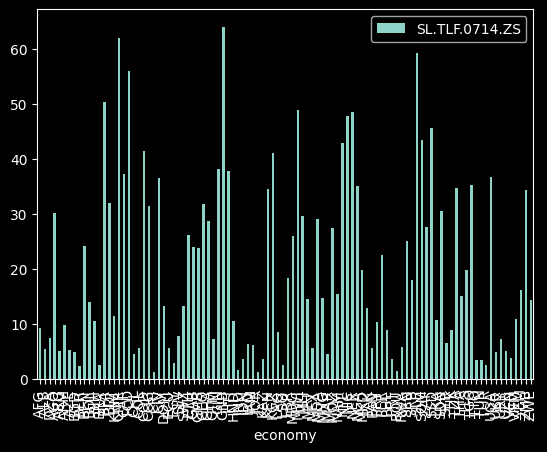

In [63]:
ce.plot(kind='bar')

In [65]:
cew = wb.data.DataFrame(series="SL.TLF.0714.WK.ZS", mrnev=10, skipAggs=True, columns='time', numericTimeKeys=True)
cew

1994  1996  1998      1999      2000  2001  2002  2003  2004  \
economy                                                                 
AFG       NaN   NaN   NaN       NaN       NaN   NaN   NaN   NaN   NaN   
AGO       NaN   NaN   NaN       NaN       NaN  26.6   NaN   NaN   NaN   
ALB       NaN   NaN   NaN       NaN  43.13078   NaN   NaN   NaN   NaN   
ARG       NaN   NaN   NaN       NaN       NaN   NaN   NaN   NaN   4.8   
ARM       NaN   NaN   NaN       NaN       NaN   NaN   NaN   NaN   NaN   
...       ...   ...   ...       ...       ...   ...   ...   ...   ...   
VNM       NaN   NaN   NaN       NaN       NaN   NaN   NaN   NaN   NaN   
YEM       NaN   NaN   NaN  64.34137       NaN   NaN   NaN   NaN   NaN   
ZAF       NaN   NaN   NaN   5.10000       NaN   NaN   NaN   NaN   NaN   
ZMB       NaN   NaN   NaN       NaN       NaN   NaN   NaN   NaN   NaN   
ZWE       NaN   NaN   NaN  12.00000       NaN   NaN   NaN   NaN   NaN   

             2005  ...  2007       2008  2009       2010  2011      2012  \
economy            ...                                                     
AFG           NaN  ...   NaN        NaN   NaN        NaN  50.0       NaN   
AGO           NaN  ...   NaN        NaN   NaN        NaN   NaN       NaN   
ALB       6.70000  ...   NaN        NaN   NaN   5.100000   NaN       NaN   
ARG           NaN  ...   NaN        NaN   NaN        NaN   NaN   4.75294   
ARM           NaN  ...   NaN        NaN   NaN   0.000000   NaN       NaN   
...           ...  ...   ...        ...   ...        ...   ...       ...   
VNM           NaN  ...   NaN        NaN   NaN        NaN  15.9  19.00000   
YEM           NaN  ...   NaN        NaN   NaN  35.970114   NaN       NaN   
ZAF           NaN  ...   NaN        NaN   NaN        NaN   NaN       NaN   
ZMB      25.92283  ...   NaN  18.575391   NaN        NaN   NaN       NaN   
ZWE           NaN  ...   NaN        NaN   NaN        NaN   NaN       NaN   

         2013  2014  2015  2016  
economy                          
AFG       NaN   NaN   NaN   NaN  
AGO       NaN   NaN   NaN   NaN  
ALB       NaN   NaN   NaN   NaN  
ARG       NaN   NaN   NaN   NaN  
ARM       NaN   NaN   NaN   NaN  
...       ...   ...   ...   ...  
VNM       NaN   NaN   NaN   NaN  
YEM       NaN   NaN   NaN   NaN  
ZAF       NaN   NaN   NaN   NaN  
ZMB       NaN   NaN   NaN   NaN  
ZWE       NaN   NaN   NaN   NaN  

[100 rows x 21 columns]

In [71]:
cew.T.tail(10).T.head(10)

2007  2008  2009       2010  2011      2012      2013  2014  2015  \
economy                                                                      
AFG       NaN   NaN   NaN        NaN  50.0       NaN       NaN   NaN   NaN   
AGO       NaN   NaN   NaN        NaN   NaN       NaN       NaN   NaN   NaN   
ALB       NaN   NaN   NaN   5.100000   NaN       NaN       NaN   NaN   NaN   
ARG       NaN   NaN   NaN        NaN   NaN   4.75294       NaN   NaN   NaN   
ARM       NaN   NaN   NaN   0.000000   NaN       NaN       NaN   NaN   NaN   
AZE       NaN   NaN   NaN        NaN   NaN       NaN       NaN   NaN   NaN   
BDI       NaN   NaN   NaN  18.300000   NaN       NaN       NaN   NaN   NaN   
BEN       NaN   NaN   NaN        NaN   NaN  32.40000       NaN   NaN   NaN   
BFA       NaN   NaN   NaN  56.833314   NaN       NaN       NaN   NaN   NaN   
BGD       NaN   NaN   NaN        NaN   NaN       NaN  58.07367   NaN   NaN   

         2016  
economy        
AFG       NaN  
AGO       NaN  
ALB       NaN  
ARG       NaN  
ARM       NaN  
AZE       NaN  
BDI       NaN  
BEN       NaN  
BFA       NaN  
BGD       NaN

In [57]:
cew = wb.data.DataFrame(series="SL.TLF.0714.WK.ZS", mrnev=1, skipAggs=True, timeColumns=True, labels=True)
cew

Country  SL.TLF.0714.WK.ZS SL.TLF.0714.WK.ZS:T
economy                                                      
AFG        Afghanistan          50.000000                2011
ALB            Albania           5.100000                2010
DZA            Algeria           4.508655                2013
AGO             Angola          26.600000                2001
ARG          Argentina           4.752940                2012
...                ...                ...                 ...
VEN      Venezuela, RB          31.134620                2013
VNM            Vietnam          19.000000                2012
YEM        Yemen, Rep.          35.970114                2010
ZMB             Zambia          18.575391                2008
ZWE           Zimbabwe          12.000000                1999

[100 rows x 3 columns]

In [58]:
pd.merge(pd.merge(cw, cew), ce)

economy        Country  SL.TLF.0714.WK.TM SL.TLF.0714.WK.TM:T  \
0      AFG    Afghanistan           13.30000                2011   
1      ALB        Albania           27.90000                2010   
2      DZA        Algeria           12.70000                2013   
3      AGO         Angola           14.60000                2001   
4      AZE     Azerbaijan           16.40000                2005   
..     ...            ...                ...                 ...   
83     VEN  Venezuela, RB           34.37214                2013   
84     VNM        Vietnam           34.20000                2012   
85     YEM    Yemen, Rep.           30.00000                2010   
86     ZMB         Zambia            4.80000                2008   
87     ZWE       Zimbabwe           43.30000                1999   

    SL.TLF.0714.WK.ZS SL.TLF.0714.WK.ZS:T  SL.TLF.0714.ZS SL.TLF.0714.ZS:T  
0           50.000000                2011        9.300000             2011  
1            5.100000                2010        5.500000             2010  
2            4.508655                2013        7.500764             2013  
3           26.600000                2001       30.100000             2001  
4            6.300000                2005        5.200000             2005  
..                ...                 ...             ...              ...  
83          31.134620                2013        3.910936             2013  
84          19.000000                2012       10.900000             2012  
85          35.970114                2010       16.100000             2010  
86          18.575391                2008       34.400000             2008  
87          12.000000                1999       14.300000             1999  

[88 rows x 8 columns]

In [59]:
from functools import reduce 
reduce(lambda left, right: pd.merge(left, right), [cw, cew, ce])

economy        Country  SL.TLF.0714.WK.TM SL.TLF.0714.WK.TM:T  \
0      AFG    Afghanistan           13.30000                2011   
1      ALB        Albania           27.90000                2010   
2      DZA        Algeria           12.70000                2013   
3      AGO         Angola           14.60000                2001   
4      AZE     Azerbaijan           16.40000                2005   
..     ...            ...                ...                 ...   
83     VEN  Venezuela, RB           34.37214                2013   
84     VNM        Vietnam           34.20000                2012   
85     YEM    Yemen, Rep.           30.00000                2010   
86     ZMB         Zambia            4.80000                2008   
87     ZWE       Zimbabwe           43.30000                1999   

    SL.TLF.0714.WK.ZS SL.TLF.0714.WK.ZS:T  SL.TLF.0714.ZS SL.TLF.0714.ZS:T  
0           50.000000                2011        9.300000             2011  
1            5.100000                2010        5.500000             2010  
2            4.508655                2013        7.500764             2013  
3           26.600000                2001       30.100000             2001  
4            6.300000                2005        5.200000             2005  
..                ...                 ...             ...              ...  
83          31.134620                2013        3.910936             2013  
84          19.000000                2012       10.900000             2012  
85          35.970114                2010       16.100000             2010  
86          18.575391                2008       34.400000             2008  
87          12.000000                1999       14.300000             1999  

[88 rows x 8 columns]

In [6]:
wb.series.metadata.get('PA.NUS.ATLS')

========
Series: PA.NUS.ATLS

Generalcomments: In the WDI database, the DEC alternative conversion factor is used to convert data in local currency units (LCU) into U.S. dollars.
--------
IndicatorName: DEC alternative conversion factor (LCU per US$)
--------
License_Type: CC BY-4.0
--------
License_URL: https://datacatalog.worldbank.org/public-licenses#cc-by
--------
Longdefinition: The DEC alternative conversion factor is the underlying annual exchange rate used for the World Bank Atlas method. As a rule, it is the official exchange rate reported in the IMF's International Financial Statistics (line rf). Exceptions arise where further refinements are made by World Bank staff. It is expressed in local currency units per U.S. dollar.
--------
Periodicity: Annual
--------
Source: International Monetary Fund, International Financial Statistics, supplemented by World Bank staff estimates.
--------
Statisticalconceptandmethodology: The World Bank systematically assesses the appropriateness of official exchange rates as conversion factors. In certain countries, multiple or dual exchange rate activity exists and must be accounted for appropriately in underlying statistics. Doing so better reflects economic reality and leads to more accurate cross-country comparisons and country classifications by income level. Consequently, an alternative conversion factor is used when the official exchange rate is judged to diverge by an exceptionally large margin from the rate effectively applied to domestic transactions of foreign currencies and traded products. This applies to only a small number of countries, as shown in the country-level metadata. An alternative conversion factor is also used when the period covered by national accounts differs from the calendar year and the alternative conversion factor will then cover the same period. Alternative conversion factors are used in the Atlas methodology and elsewhere in World Development Indicators as single-year conversion factors.
--------
Topic: Financial Sector: Exchange rates & prices

In [2]:
er = wb.data.DataFrame(series="PA.NUS.ATLS", economy="all", skipAggs=True, columns='time', numericTimeKeys=True)
er

1960          1961          1962          1963          1964  \
economy                                                                         
ABW               NaN           NaN           NaN           NaN           NaN   
AFG      4.500000e+01  4.500000e+01  4.500000e+01  4.500000e+01  4.500000e+01   
AGO      2.866844e-08  2.873486e-08  2.867844e-08  2.875203e-08  2.881978e-08   
ALB               NaN           NaN           NaN           NaN           NaN   
AND               NaN           NaN           NaN           NaN           NaN   
...               ...           ...           ...           ...           ...   
XKX               NaN           NaN           NaN           NaN           NaN   
YEM               NaN           NaN           NaN           NaN           NaN   
ZAF      7.142860e-01  7.142860e-01  7.142860e-01  7.142860e-01  7.142860e-01   
ZMB      7.000000e-04  7.000000e-04  7.000000e-04  7.000000e-04  7.000000e-04   
ZWE      1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

                 1965          1966          1967          1968          1969  \
economy                                                                         
ABW               NaN           NaN           NaN           NaN           NaN   
AFG      4.500000e+01  4.500000e+01  4.500000e+01  4.500000e+01  4.500000e+01   
AGO      2.877853e-08  2.882386e-08  2.884161e-08  2.872761e-08  2.856119e-08   
ALB               NaN           NaN           NaN           NaN           NaN   
AND               NaN           NaN           NaN           NaN           NaN   
...               ...           ...           ...           ...           ...   
XKX               NaN           NaN           NaN           NaN           NaN   
YEM               NaN           NaN           NaN  2.793300e+00  4.437900e+00   
ZAF      7.142860e-01  7.142860e-01  7.142860e-01  7.142860e-01  7.142860e-01   
ZMB      7.000000e-04  7.000000e-04  7.000000e-04  7.000000e-04  7.000000e-04   
ZWE      1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

         ...        2013        2014        2015        2016        2017  \
economy  ...                                                               
ABW      ...    1.790000    1.790000    1.790000    1.790000    1.790000   
AFG      ...   55.377500   57.247500   61.143500   67.866100   68.026900   
AGO      ...   98.911900  104.367500  159.945000  332.050600  293.772400   
ALB      ...  105.669167  105.480000  125.961667  124.142500  119.099700   
AND      ...    0.752945    0.752728    0.901296    0.903421    0.885206   
...      ...         ...         ...         ...         ...         ...   
XKX      ...    0.752945    0.752728    0.901296    0.903421    0.885206   
YEM      ...  214.890000  214.890000  230.833333  283.895833  372.770800   
ZAF      ...    9.650200   10.844400   12.750700   14.708800   13.312900   
ZMB      ...    5.397500    6.155000    8.629200   10.310800    9.517500   
ZWE      ...    1.000000    1.000000    1.000000    1.000000    1.253400   

               2018        2019        2020         2021         2022  
economy                                                                
ABW        1.790000    1.790000    1.790000     1.790000     1.790000  
AFG       72.083200   77.737900   76.813500    84.540000    88.469728  
AGO      329.435300  437.611000  630.969500   678.044500   500.171825  
ALB      107.989167  109.850833  108.650000   103.520000   113.041667  
AND        0.846773    0.893276    0.875506     0.845377     0.950916  
...             ...         ...         ...          ...          ...  
XKX        0.846773    0.893216    0.877475     0.845500     0.949700  
YEM      535.899500  575.954100  743.005964  1035.467186  1110.202809  
ZAF       13.233926   14.448427   16.459105    14.778678    16.355853  
ZMB       10.458333   12.890000   18.344093    20.018487    16.937594  
ZWE        2.038100    9.718400   64.101100   112.435600